In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# generate simple 2 dimensional data

x = np.linspace(0,10,100)[:, np.newaxis]
a = 5
b = 10
y = a + b * x

w[0] = a = 10.0
w[1] = b = 4.999999999999956


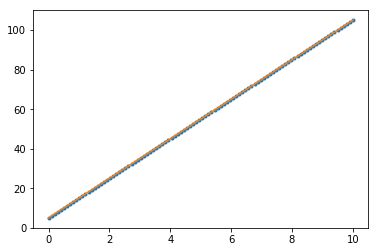

In [11]:
# We will build a linear regression, thus 
# y = b + a x, thus we need to find a and b,
# if we include columns of ones into x the formula becomes:
# y = w'X

X = np.concatenate([np.ones((100,1)), x], axis=1) 

# Normal equation gives us the exact formula for
# finding coefficient w

w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('w[0] = a = {}\nw[1] = b = {}'.format(w[1][0], w[0][0]))

# y_regression = w[0] * x + w[1], here w[0] = a, w[1] = b

y_reg = (w.T.dot(X.T)).T


plt.plot(x, y, '.')
plt.plot(x, y_reg);
plt.show()

# As we can see linear dependecies are predicted perfectly!
# What about non-linear?

In [12]:
x = np.linspace(0,10,100)[:, np.newaxis]

y = x ** 2 + 3 

w[0] = a = -13.498316498316523
w[1] = b = 10.0


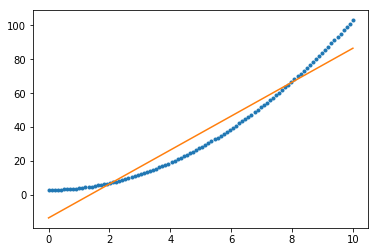

In [13]:
X = np.concatenate([np.ones((100,1)), x], axis=1) 
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('w[0] = a = {}\nw[1] = b = {}'.format(w[0][0], w[1][0]))
y_reg = (w.T.dot(X.T)).T


plt.plot(x, y, '.')
plt.plot(x, y_reg);
plt.show()

# Not that good at all, but what if we add polynomial features?

[[  3.00000000e+00]
 [  8.03801470e-14]
 [  1.00000000e+00]]


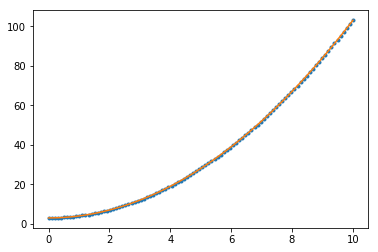

In [14]:
X = np.concatenate([X, x**2], axis=1)

# Now we are looking for y = a + b x + c x**2

w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_reg = (w.T.dot(X.T)).T

print(w)

plt.plot(x, y, '.')
plt.plot(x, y_reg);
plt.show()

In [15]:
# Now let's see how could we measure the
# goodness of the fit numerically

# y_reg stores predicted values
# y stores original values
# use Mean Squared Error (MSE)
def mean_squared_error(y_true, y_predicted):
    return ((y_true - y_predicted)**2).mean()

x = np.linspace(0,10,100)[:, np.newaxis]

y = x ** 2 + 3 

X = np.concatenate([np.ones((100,1)), x], axis=1) 
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print('w[0] = a = {}\nw[1] = b = {}'.format(w[0][0], w[1][0]))
y_reg = (w.T.dot(X.T)).T

print(mean_squared_error(y, y_reg))


w[0] = a = -13.498316498316523
w[1] = b = 10.0
57.805549286


In [16]:

X = np.concatenate([X, x**2], axis=1)

# Now we are looking for y = a + b x + c x**2

w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_reg = (w.T.dot(X.T)).T

print(mean_squared_error(y, y_reg))

1.27422276273e-25


In [17]:
# One more complex example with say sinus, or just 
# some polynomial of higher order and then give an idea of 
# train-validation-test. But don't start with CV!

In [18]:
# Ok, great, we can approximate any
# non-linear function using that trick, so what is the problem?
# Overfitting